In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score



In [123]:
data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [124]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
data.shape

(891, 12)

In [126]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [127]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [128]:
data['Survived'].value_counts().keys()

Int64Index([0, 1], dtype='int64')

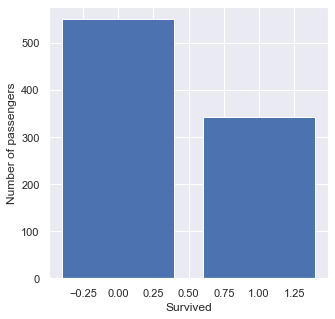

In [129]:
plt.figure(figsize=(5,5))
plt.bar(list(data['Survived'].value_counts().keys()),list(data['Survived'].value_counts()))
plt.xlabel("Survived")
plt.ylabel("Number of passengers")
plt.show()

In [130]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

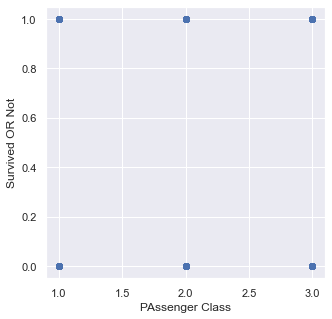

In [131]:
plt.figure(figsize=(5,5))
plt.scatter(data['Pclass'],data['Survived'])
plt.xlabel("PAssenger Class")
plt.ylabel("Survived OR Not")
plt.show()

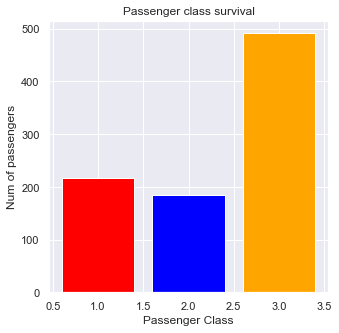

In [132]:
plt.figure(figsize=(5,5))
plt.bar(list(data['Pclass'].value_counts().keys()),list(data['Pclass'].value_counts()),color=['orange','red','blue'])
plt.xlabel("Passenger Class")
plt.ylabel("Num of passengers")
plt.title("Passenger class survival")
plt.show()



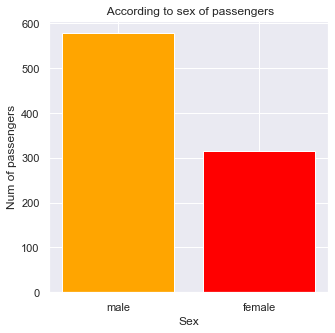

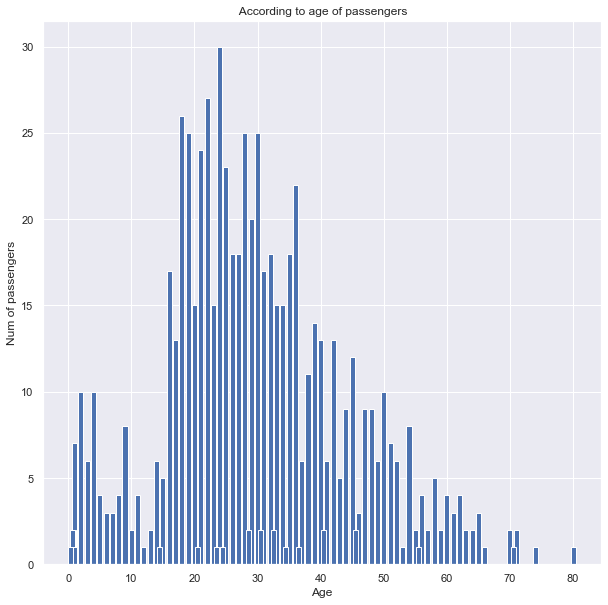

In [133]:
plt.figure(figsize=(5,5))

plt.bar(list(data['Sex'].value_counts().keys()),list(data['Sex'].value_counts()),color=['orange','red','blue'])
plt.xlabel("Sex")
plt.ylabel("Num of passengers")
plt.title(" According to sex of passengers")

plt.show()

plt.figure(figsize=(10,10))

plt.bar(list(data['Age'].value_counts().keys()),list(data['Age'].value_counts()))
plt.xlabel("Age")
plt.ylabel("Num of passengers")
plt.title(" According to age of passengers")

plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

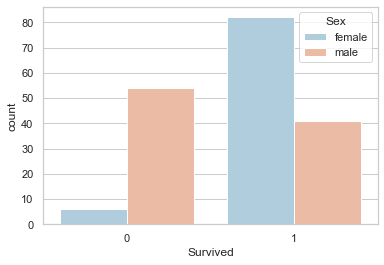

In [156]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

<AxesSubplot:>

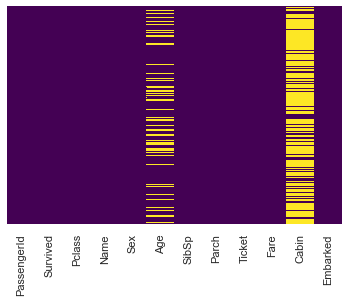

In [134]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [135]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [136]:
data['Cabin'].isnull().sum()

687

In [137]:
data['Age'].isnull().sum()

177

In [138]:
data=data.dropna()

In [139]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
871,False,False,False,False,False,False,False,False,False,False,False,False
872,False,False,False,False,False,False,False,False,False,False,False,False
879,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False


In [140]:
data['Cabin'].isnull().sum()

0

In [141]:
data['Age'].isnull().sum()

0

In [142]:
data.shape

(183, 12)

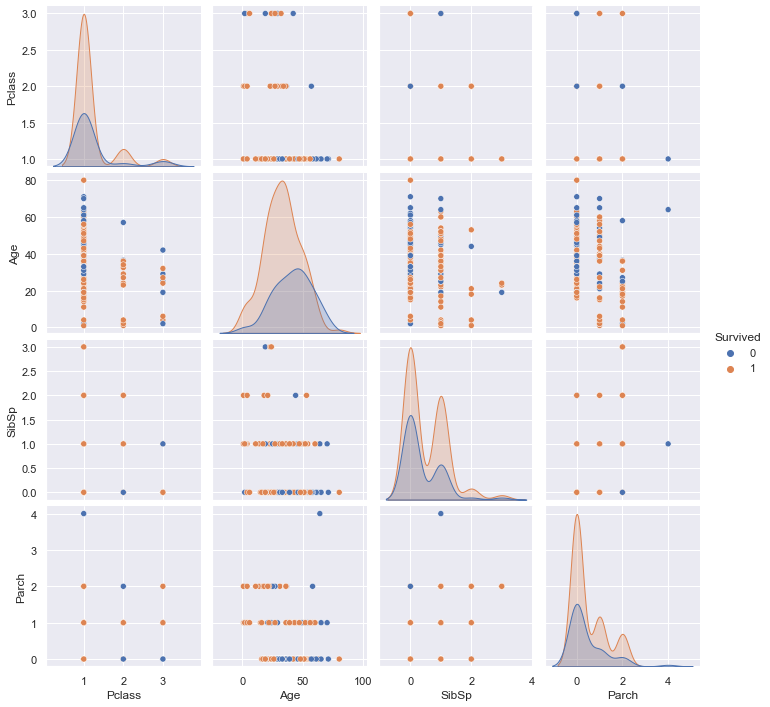

In [143]:
graph=[ 'Pclass', 'Age', 'SibSp',
       'Parch',  'Cabin','Survived']
sns.set()
print(sns.pairplot(data[graph],hue='Survived'))

In [144]:
x_train=data[['Age']]
y_train=data[['Survived']]

Decision Tree Model

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [146]:
Classifier=DecisionTreeClassifier()
Classifier.fit(x_train,y_train)


DecisionTreeClassifier()

In [147]:
x_test=test_data
x_test['Age'].isnull().sum()

86

In [148]:
x_test=x_test.dropna()
x_test=x_test[['Age']]
y_predict=Classifier.predict(x_test)

In [149]:
y_predict

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
      dtype=int64)

Random Forest Model

In [150]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier(random_state=10)
random_forest_model.fit(x_train,y_train)

<ipython-input-150-aee91919c98e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(x_train,y_train)


RandomForestClassifier(random_state=10)

In [151]:
predict_train_data=random_forest_model.predict(x_test)

In [152]:
predict_train_data

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
      dtype=int64)

 KNN Algorithm

In [160]:
from sklearn.neighbors import KNeighborsClassifier
KClassifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
KClassifier.fit(x_train,y_train)

<ipython-input-160-e7b96ec7e778>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  KClassifier.fit(x_train,y_train)


KNeighborsClassifier()

In [161]:
knpredict=KClassifier.predict(x_test)

In [162]:
knpredict

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1],
      dtype=int64)

In [173]:
predicted_data=[y_predict,knpredict,predict_train_data]

In [174]:
predicted_data_columns=['Decision Tree','KNN','Random Forest']

In [175]:
tuples=list(zip(predicted_data,predicted_data_columns))

In [176]:
tuples

[(array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
         1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
         1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        dtype=int64),
  'Decision Tree'),
 (array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
         0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
         1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
         1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1],
        dtype=int64),
  'KNN'),
 (array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
         1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
         1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
         1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        dtype=int64),
  'Random 

In [179]:
df=pd.DataFrame(tuples,columns=['Output Predicted','Used Algorithm'])

In [180]:
df

,Output Predicted,Used Algorithm
0,"[1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, ...",Decision Tree
1,"[1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",KNN
2,"[1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...",Random Forest
